In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from SimiLab import tempName
import pickle
from pathlib import Path
import numpy as np

/home/cselmo/miniconda3/envs/NLP/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
folder = "NYT-TG"
word_index_file = Path(folder+"/word_index-NYT-TG.pkl")
slices_file = Path(folder+"/slices-NYT-TG.pkl")
sampling_tables_file = Path(folder+"/sampling_tables-NYT-TG.pkl")
mean_file = Path(folder+"/mean-NYT-TG.pck")
deltas_file = Path(folder+"/delta-NYT-TG.pck")
test_sim_file = Path(folder+"/testset_sim-NYT-TG.csv")
test_cluster_file = Path(folder+"/testset_cluster_NYT-TG.csv")

In [8]:
with word_index_file.open("rb") as f:
    word_index = pickle.load(f)
    
with slices_file.open("rb") as f:
    slices = pickle.load(f)
    
with sampling_tables_file.open("rb") as f:
    sampling_tables = pickle.load(f)
    
with mean_file.open("rb") as f:
    mean = pickle.load(f)

with deltas_file.open("rb") as f:
    deltas = pickle.load(f)

In [9]:
# Create the embeddings matrices
embs = list()
yearDict= dict()
vocabularies =  list()
for idx, slc in enumerate(slices):
    mask=np.array(sampling_tables[slc]) !=0
    embs.append((mean + deltas[slc])[mask,:])
    yearDict[slc]=idx
    vocabulary = np.array(list(word_index.keys()))[mask]
    vocabulary = {word:index for index,word in enumerate(vocabulary)}
    vocabularies.append(vocabulary)

In [10]:
sim_class= tempName(embs, yearDict, vocabularies)

In [11]:
vector = sim_class.getVector("cameron","tg")

In [12]:
sim_class.findSimilars2Vec(vector, "nyt",maxWords=10)

{'obama': 0.79266864,
 'secretary': 0.74733526,
 'blasio': 0.72890615,
 'bush': 0.72106296,
 'president': 0.7104401,
 'cabinet': 0.6933747,
 'christie': 0.6899376,
 'administration': 0.67981404,
 'appeared': 0.67205334,
 'clinton': 0.66997826}

In [13]:
sim_class.findSimilars2Vec(vector, "nyt",maxWords=20)

{'obama': 0.79266864,
 'secretary': 0.74733526,
 'blasio': 0.72890615,
 'bush': 0.72106296,
 'president': 0.7104401,
 'cabinet': 0.6933747,
 'christie': 0.6899376,
 'administration': 0.67981404,
 'appeared': 0.67205334,
 'clinton': 0.66997826,
 'obama’s': 0.6566844,
 'elected': 0.6560358,
 'aides': 0.65598476,
 'budget': 0.6553111,
 'mayor': 0.65182495,
 'criticism': 0.64337313,
 'tuesday': 0.6429299,
 'declared': 0.64168715,
 'criticized': 0.6382894,
 'congress': 0.63545126}

In [14]:
sim_class.findSimilars2Word("bush","nyt",maxWords=10)

{'bush': 1.0,
 'george': 0.75994945,
 'w': 0.71676475,
 'clinton': 0.71552384,
 'john': 0.7147993,
 'obama': 0.7136402,
 'reagan': 0.6902181,
 'mrs': 0.67815137,
 'declared': 0.6287072,
 'bush’s': 0.62697166}

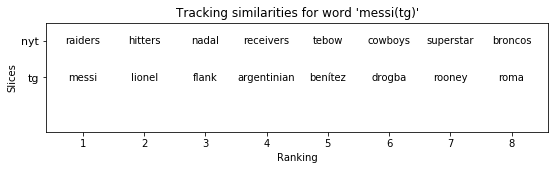

In [19]:
ref_word= "messi"
ref_year= "tg"
maxWords = 8
track_list =[]
file = f"evo_NYT-TG_{ref_word}_{ref_year}.pdf"
sim_class.plotEvo(ref_word,ref_year, maxWords,track_list,figsize=(9,2),file=file)

In [531]:
sim_class.sim_tests(test_sim_file, n_neighbors=[1,3,5,10])

aegean aegean
archaeological archaeological
archaeologist archaeologist
archaeologists archaeologists
archaeology archaeology
bused bussed
centre center
deflection deflection
dive dove
doughnuts donuts
endeavour endeavor
gauge gauge
gauged gauged
gauging gauging
grey gray
harbour harbor
labour labor
labour labor
partisan partizan
storey story
theatre theater
tranquillity tranquility
whisky whiskey
Total 23
Baseline: 0.391304347826087


[0.391304347826087,
 0.391304347826087,
 0.391304347826087,
 0.391304347826087,
 0.391304347826087]

In [532]:
sim_class.cluster_test(test_cluster_file, clusters=[10,15,20])

{'NMI(10)': 0.6582680275836703,
 'F_beta-score(10)': 0.6911866886486223,
 'NMI(15)': 0.730287461301854,
 'F_beta-score(15)': 0.6686426563067949,
 'NMI(20)': 0.7017164659451998,
 'F_beta-score(20)': 0.5245949895052548}

In [533]:
len(word_index)

63071

In [534]:
sim_class.findSimilars2Vec(vector,"nyt",maxWords=10)

{'cameron': 0.5605171,
 'labour': 0.5291797,
 'berlusconi': 0.52462363,
 'obama': 0.46098864,
 'aides': 0.45416018,
 'gingrich': 0.4363283,
 'democratic': 0.4339284,
 'secretary': 0.4310413,
 'campaigning': 0.43081933,
 'sarkozy': 0.42777297}

In [535]:
word = "cameron"
slice_ref = "tg"
slice_to = "nyt"
vector = sim_class.getVector(word,slice_ref)
lista_ref = list(sim_class.findSimilars2Vec(vector,slice_ref,maxWords=1).keys())
lista_to = list(sim_class.findSimilars2Vec(vector,slice_to,maxWords=1000).keys())
if word in sim_class.vocabularies[sim_class.yearDict[slice_to]]:
    lista_to.insert(1,word)
vectors = list()
for word in lista_ref:
    vec = sim_class.getVector(word,"tg")
    vec = vec / np.linalg.norm(vec)
    vectors.append(vec)
for word in lista_to:
    vec = sim_class.getVector(word,"nyt")
    vec = vec / np.linalg.norm(vec)
    vectors.append(vec)


In [536]:
len(vectors)

1002

In [537]:
from sklearn.manifold import TSNE
def tsne_plot(tokens,list_ref,list_to):
    labels = list_ref + list_to
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, learning_rate=200, metric="cosine")
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(1,min(len(list_ref),10)):
        plt.scatter(x[i],y[i],c="b")
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     c='b')
    for i in range(len(list_ref)+2,min(len(list_ref)+len(list_to),10+len(list_ref)+2)):
        plt.scatter(x[i],y[i],c="r",s=20)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                    c='r')
    plt.scatter(x[0],y[0],c="b", s=50)
    plt.annotate(labels[0],
                 xy=(x[0], y[0]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 c='b',
                 fontsize = 20)
    plt.scatter(x[len(list_ref)],y[len(list_ref)],c="r", s=50)
    plt.annotate(labels[len(list_ref)],
                 xy=(x[len(list_ref)], y[len(list_ref)]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 c='r',
                 fontsize = 20)
    plt.scatter(x[len(list_ref)+1],y[len(list_ref)+1],c="r", s=50)
    plt.annotate(labels[len(list_ref)+1],
                 xy=(x[len(list_ref)+1], y[len(list_ref)+1]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 c='r',
                 fontsize = 20)
    plt.savefig("tsne.png")
    plt.show()

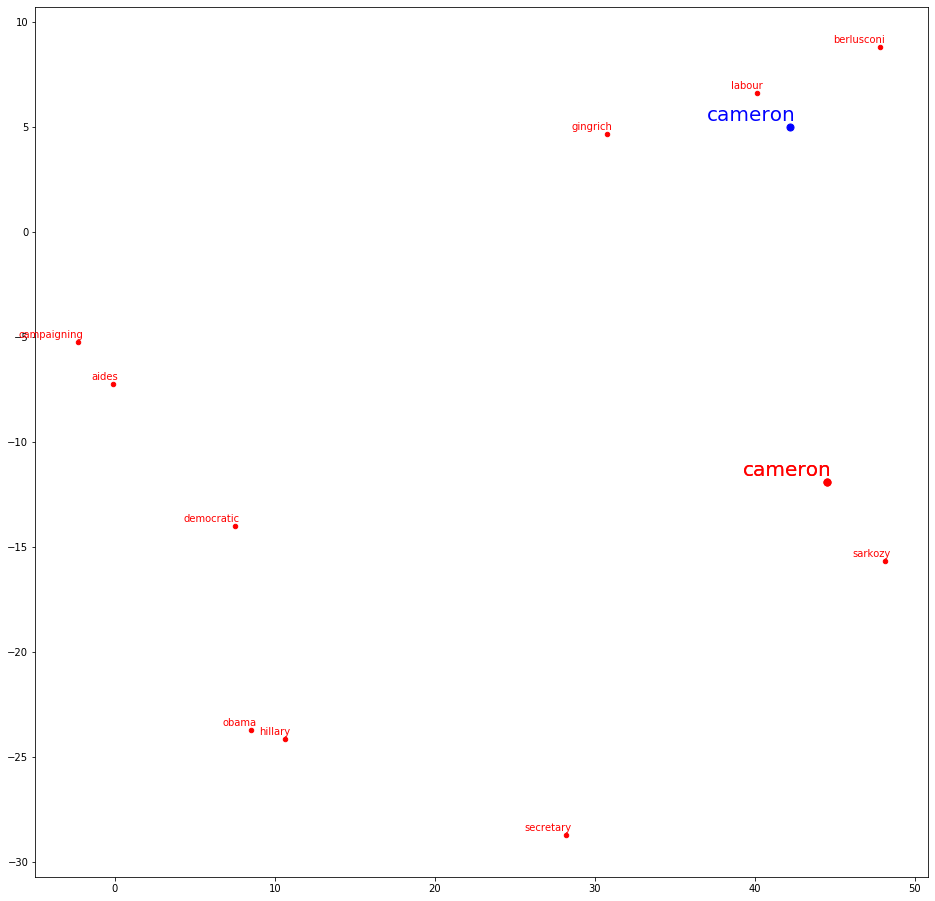

In [538]:
from matplotlib import pyplot as plt
tsne_plot(vectors, lista_ref, lista_to)

In [429]:
"johnson" in sim_class.vocabularies[0]

True

In [380]:
lista_ref

['cameron']

In [382]:
lista_to[1]

'obama'